<a href="https://colab.research.google.com/github/ishnt/Data_science_stuff/blob/main/Implementation_of_ANN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import keras

In [69]:
print(tf.__version__)

2.15.0


In [70]:
print(keras.__version__)

2.15.0


In [71]:
mnist=tf.keras.datasets.mnist

In [72]:
print(mnist)

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>


In [73]:
(x_train_full,y_train_full),(x_test,y_test)=mnist.load_data()

In [74]:
x_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [75]:
x_train_full.shape

(60000, 28, 28)

In [76]:
y_train_full.shape

(60000,)

In [77]:
x_test.shape

(10000, 28, 28)

In [78]:
y_test.shape

(10000,)

In [79]:
x_valid=x_train_full[:5000]/255

In [80]:
x_train=x_train_full[5000:]/255

In [81]:
y_valid=y_train_full[:5000]

In [82]:
y_train=y_train_full[5000:]

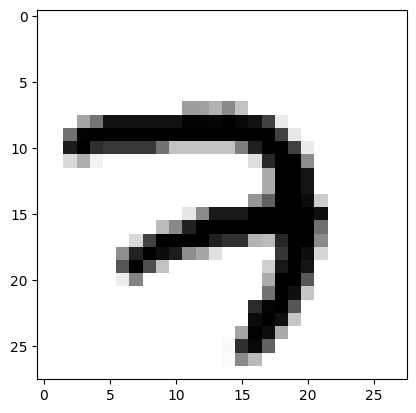

In [83]:
plt.imshow(x_train[0],cmap='binary')

In [84]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [85]:
LAYERS=[
    tf.keras.layers.Flatten(input_shape=[28,28],name="inputLayer"),
    tf.keras.layers.Dense(300,activation='relu',name="hiddenLayer1"),
    tf.keras.layers.Dense(100,activation='relu',name="hiddenLayer2"),
    tf.keras.layers.Dense(10,activation='softmax',name="outputLayer")
]

In [86]:
model=tf.keras.models.Sequential(LAYERS)

In [87]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [88]:
LOSS_FUNCTION="sparse_categorical_crossentropy"
OPTIMIZER="SGD"
METRICS=["accuracy"]
model.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [89]:
validation_set=(x_valid,y_valid)

In [90]:
history=model.fit(x_train,y_train,epochs=25,validation_data=validation_set,batch_size=32)

Epoch 1/25
1719/1719 [==============================] - 10s 5ms/step - loss: 0.6141 - accuracy: 0.8433 - val_loss: 0.3002 - val_accuracy: 0.9200
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2870 - accuracy: 0.9190 - val_loss: 0.2361 - val_accuracy: 0.9350
Epoch 3/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2361 - accuracy: 0.9329 - val_loss: 0.2089 - val_accuracy: 0.9456
Epoch 4/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2027 - accuracy: 0.9419 - val_loss: 0.1780 - val_accuracy: 0.9518
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1778 - accuracy: 0.9492 - val_loss: 0.1636 - val_accuracy: 0.9552
Epoch 6/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1584 - accuracy: 0.9545 - val_loss: 0.1470 - val_accuracy: 0.9602
Epoch 7/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1420 - accuracy: 0.9597 - val_loss: 0.1347 - val_accuracy

In [91]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.614077,0.843309,0.300245,0.9200
1,0.287008,0.919018,0.236083,0.9350
2,0.236147,0.932873,0.208926,0.9456
3,0.202695,0.941945,0.178008,0.9518
4,0.177838,0.949200,0.163602,0.9552
5,0.158378,0.954527,0.146980,0.9602
6,0.142038,0.959673,0.134739,0.9654
7,0.128736,0.963509,0.125791,0.9654
8,0.117313,0.966636,0.118365,0.9656
9,0.107556,0.969218,0.112586,0.9684


<Axes: >

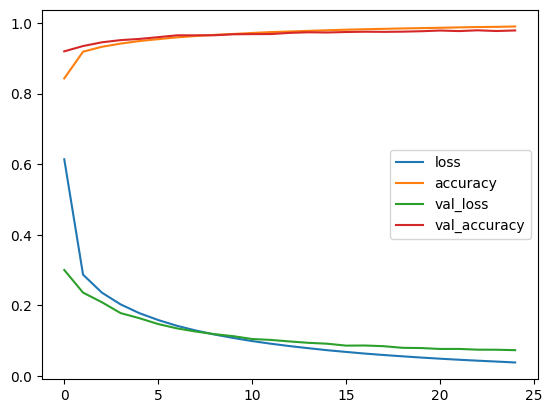

In [92]:
pd.DataFrame(history.history).plot()

In [93]:
#testing
x_new=x_test[:3]


In [94]:
y_pred=model.predict(x_new)

1/1 [==============================] - 0s 64ms/step


In [95]:
np.argmax(y_pred,axis=-1)

array([7, 2, 1])

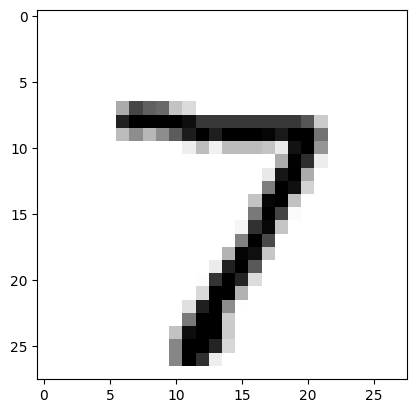

In [96]:
plt.imshow(x_test[0],cmap='binary')



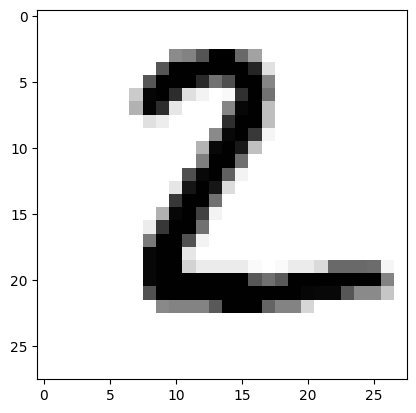

In [97]:
plt.imshow(x_test[1],cmap='binary')

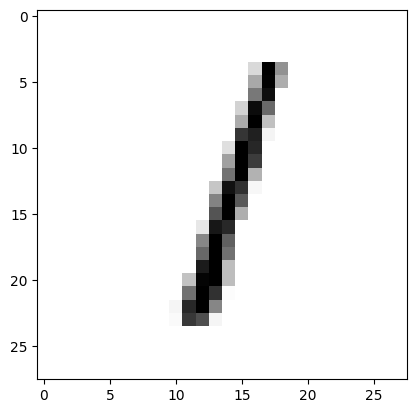

In [98]:
plt.imshow(x_test[2],cmap='binary')